# Bike Sharing Assignment

## Problem Statement:


A US bike-sharing provider BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

#### Essentially, the company wants —



Which variables are significant in predicting the demand for shared bikes.

How well those variables describe the bike demands

## Importing Libraries

In [402]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [403]:
df = pd.read_csv("day.csv")
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [404]:
df=df.drop(['instant','casual','registered','dteday'],axis=1)

#### Droping the columns reason:

"instant" - It is an Index of the table ,No useful in our analysis

"casual" and "registered" - Their affect is already covered in our target variable "cnt"

"dteday"-Month and year is already covered in other columns and date will increase the # variable drastically and make the analysis compex

In [405]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [406]:
df.shape

(730, 12)

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [408]:
df['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [409]:
df['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [410]:
df['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [411]:
df.workingday.value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [412]:
df.holiday.value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [413]:
df.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [414]:
df.yr.value_counts()

yr
0    365
1    365
Name: count, dtype: int64

## Data Preparation

Mapping the columns "season" and "weathersit" as per the data dictionary

In [415]:
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
df['season'] = df['season'].map(season_map)

In [416]:
df['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [417]:
weathersit_map={1:'Clear_Weather',2:'Misty_Weather' ,3:"Light Snow_Weather " ,4:"Heavy Rains_Weather"}
df['weathersit'] = df['weathersit'].map(weathersit_map)
df['weathersit'].value_counts()

weathersit
Clear_Weather          463
Misty_Weather          246
Light Snow_Weather      21
Name: count, dtype: int64

In [418]:
weekday_map= {1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}
df['weekday'] = df['weekday'].map(weekday_map)
df['weekday'].value_counts()

weekday
Mon      105
Tues     105
Wed      105
Thurs    104
Sat      104
Sun      104
Fri      103
Name: count, dtype: int64

In [419]:
mnth_map= {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug', 9: 'Sep', 10:'Oct', 11:'Nov', 12: 'Dec'}
df['mnth'] = df['mnth'].map(mnth_map)
df['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [420]:
yr_map= {1: 2019, 0: 2018}
df['yr'] = df['yr'].map(yr_map)
df['yr'].value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

In [421]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Mon,0,Misty_Weather,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Tues,0,Misty_Weather,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Wed,1,Clear_Weather,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thurs,1,Clear_Weather,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Fri,1,Clear_Weather,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

In [422]:
dummy_season = pd.get_dummies(df['season'], drop_first = True,dtype=int )
dummy_yr = pd.get_dummies(df['yr'], drop_first = True,dtype=int)
dummy_mnth = pd.get_dummies(df['mnth'], drop_first = True,dtype=int)
dummy_weekday = pd.get_dummies(df['weekday'], drop_first = True,dtype=int)
dummy_weathersit = pd.get_dummies(df['weathersit'], drop_first = True,dtype=int)

#Adding the dummy variables to orignal dataframe
df = pd.concat([df, dummy_season,dummy_yr,dummy_mnth,dummy_weekday,dummy_weathersit], axis = 1)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow_Weather,Misty_Weather
0,spring,2018,Jan,0,Mon,0,Misty_Weather,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,2018,Jan,0,Tues,0,Misty_Weather,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,2018,Jan,0,Wed,1,Clear_Weather,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,2018,Jan,0,Thurs,1,Clear_Weather,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,2018,Jan,0,Fri,1,Clear_Weather,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [423]:
#dropping redundant variables
df = df.drop(['season','yr','mnth','weekday','weathersit'], axis = 1)
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow_Weather,Misty_Weather
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Doing EDA on the data we have

### Univariate analysis

In [424]:
df.columns

Index([            'holiday',          'workingday',                'temp',
                     'atemp',                 'hum',           'windspeed',
                       'cnt',              'spring',              'summer',
                    'winter',                  2019,                 'Aug',
                       'Dec',                 'Feb',                 'Jan',
                       'Jul',                 'Jun',                 'Mar',
                       'May',                 'Nov',                 'Oct',
                       'Sep',                 'Mon',                 'Sat',
                       'Sun',               'Thurs',                'Tues',
                       'Wed', 'Light Snow_Weather ',       'Misty_Weather'],
      dtype='object')

In [425]:
cont_var=['temp','atemp','hum','windspeed','cnt']

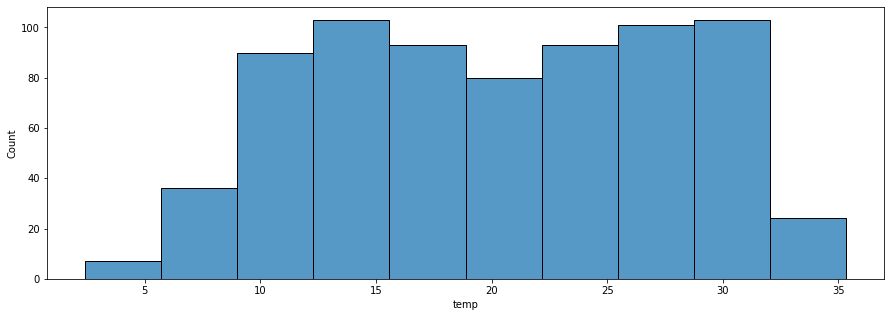

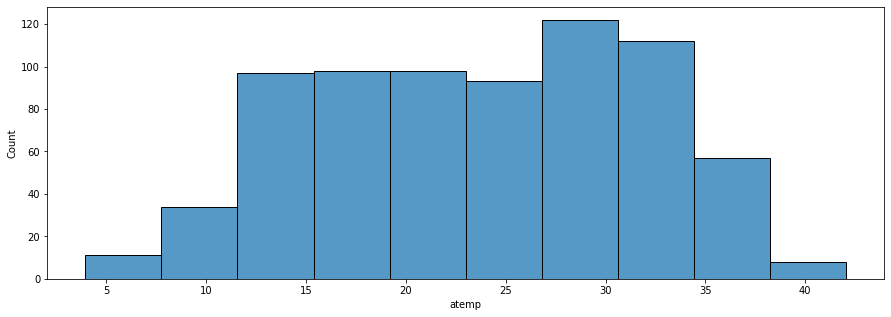

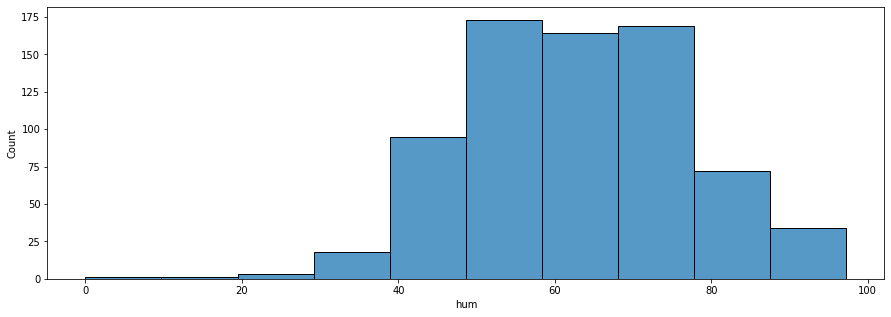

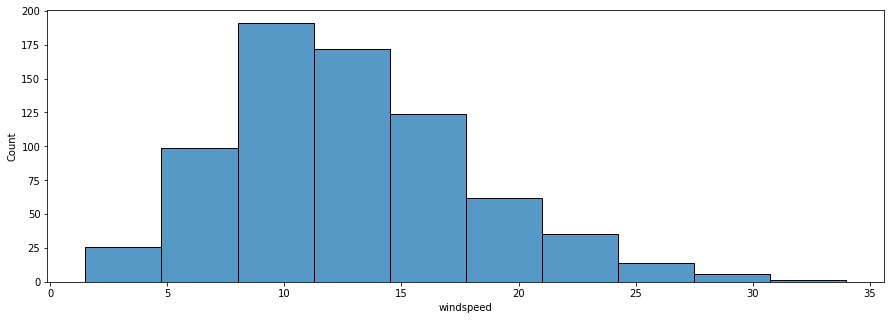

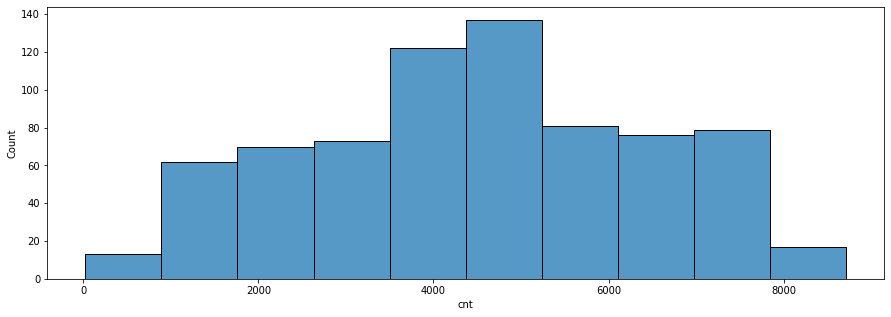

In [426]:
for col in cont_var:
    plt.figure(figsize=(15,5))
    sns.histplot(df[col] ,  bins =10)
    plt.show()

### Points to Note:
#### 1) Max value of "cnt" goes from 0 to over 8000 with max frequency 120-130 for the cnt value 4000-5000
#### 2) Range of the humidity is between 30-90, highest frequency around 45-80
#### 3) Temp varies alot accounding to frequency , looks like place with a moderate climate


In [427]:
cat_cols = [col for col in df.columns if col not in cont_var]
cat_cols

['holiday',
 'workingday',
 'spring',
 'summer',
 'winter',
 2019,
 'Aug',
 'Dec',
 'Feb',
 'Jan',
 'Jul',
 'Jun',
 'Mar',
 'May',
 'Nov',
 'Oct',
 'Sep',
 'Mon',
 'Sat',
 'Sun',
 'Thurs',
 'Tues',
 'Wed',
 'Light Snow_Weather ',
 'Misty_Weather']

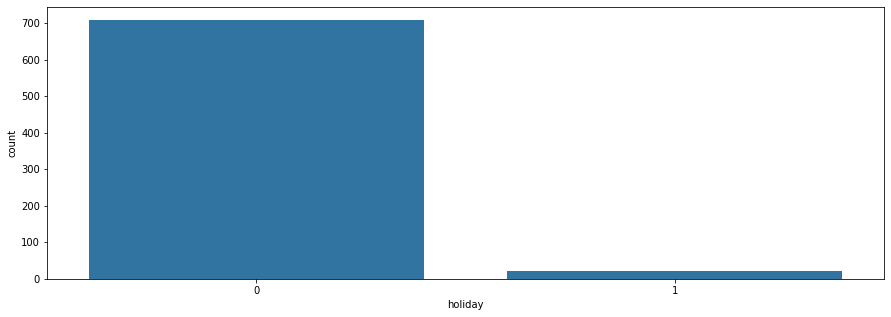

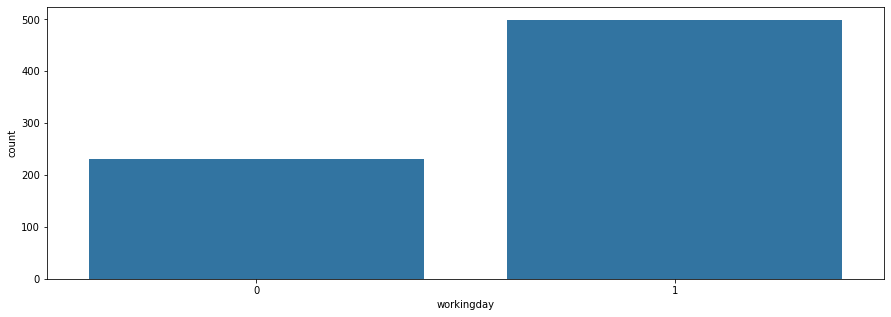

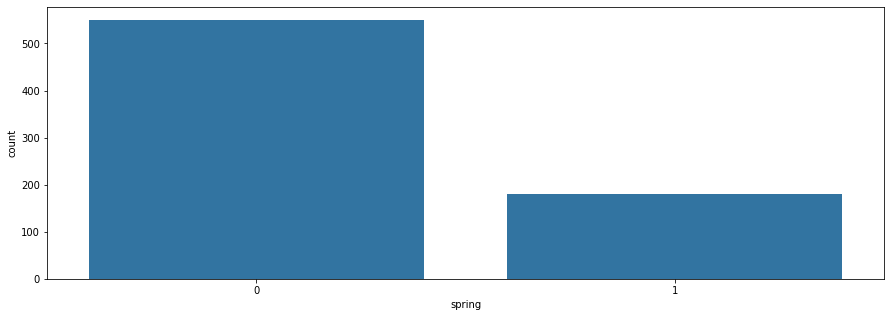

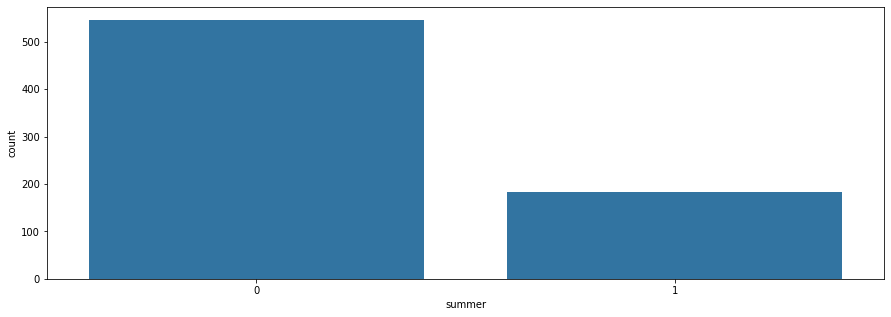

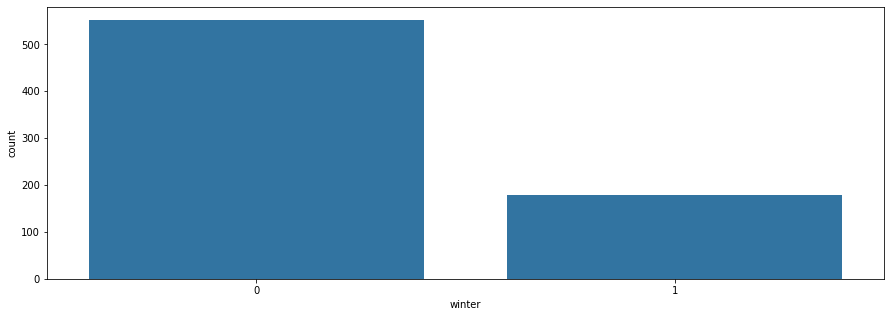

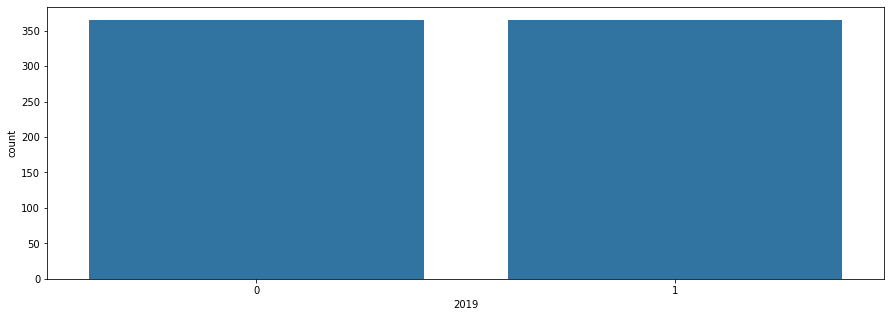

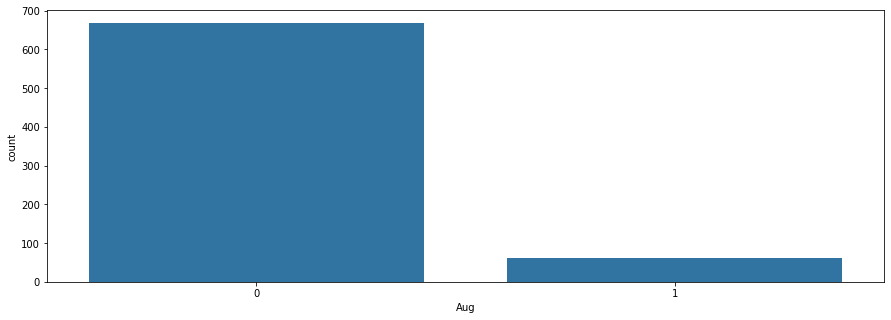

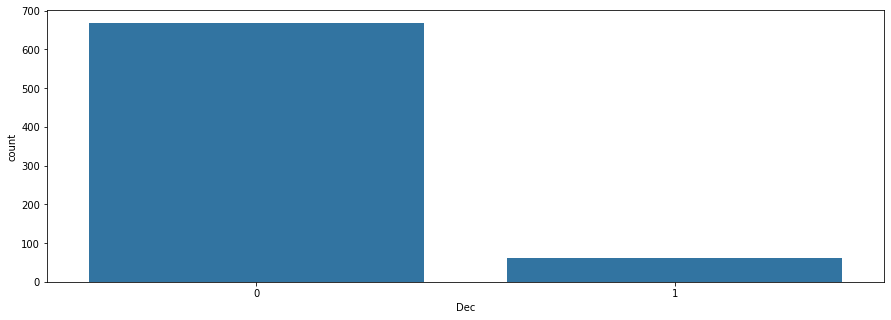

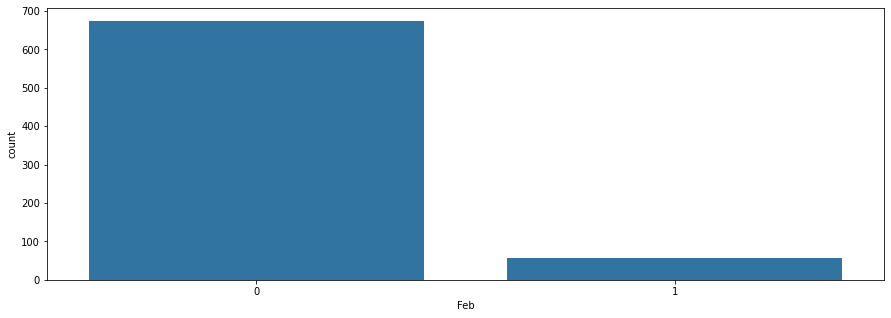

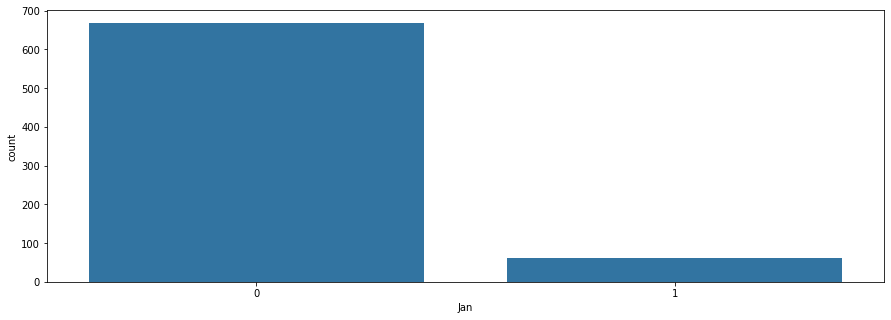

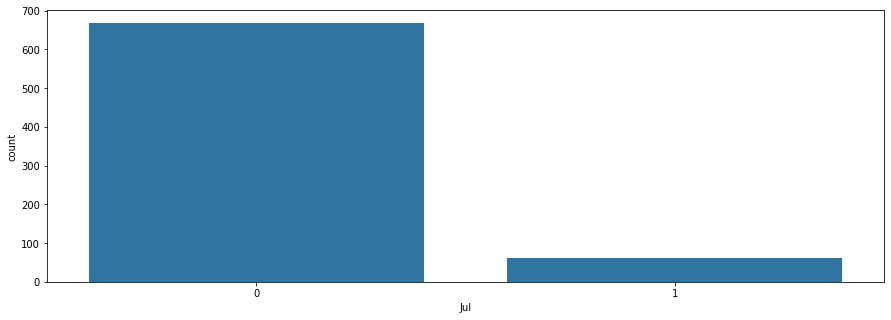

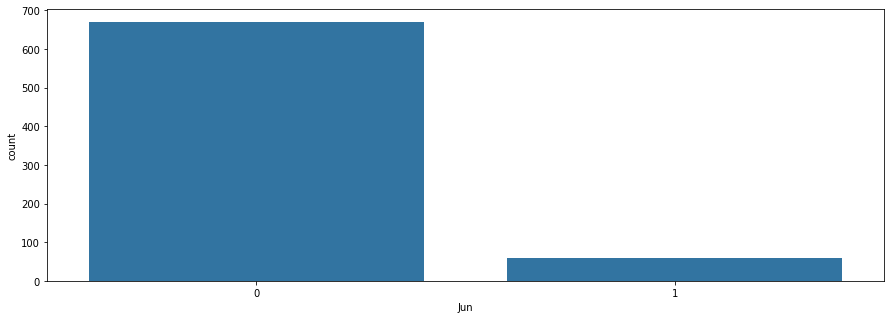

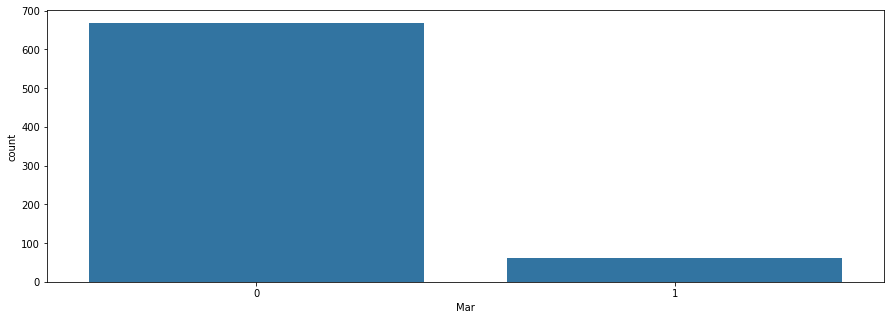

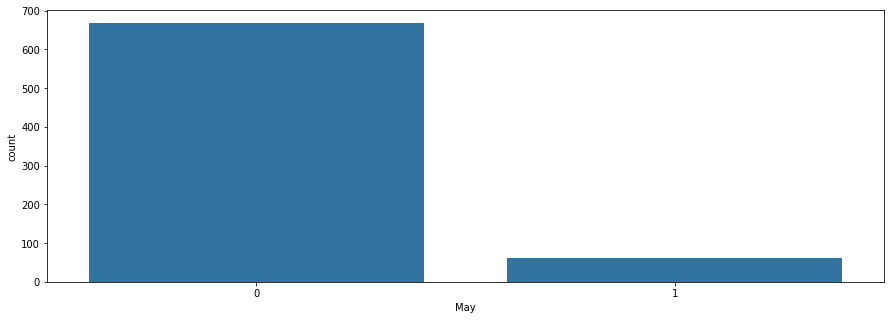

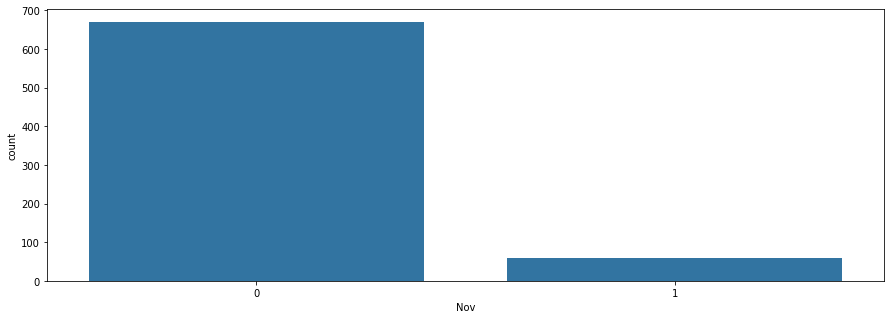

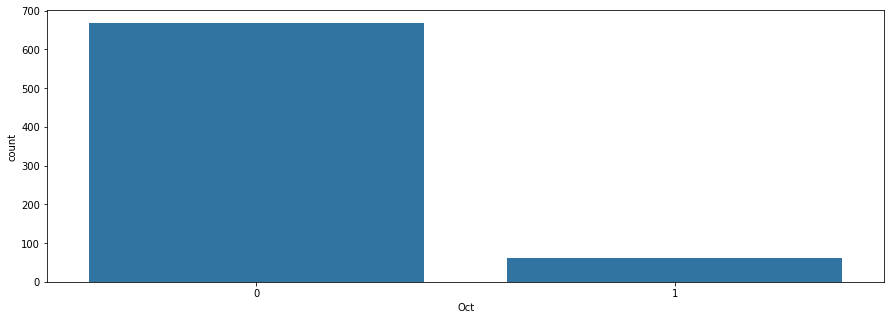

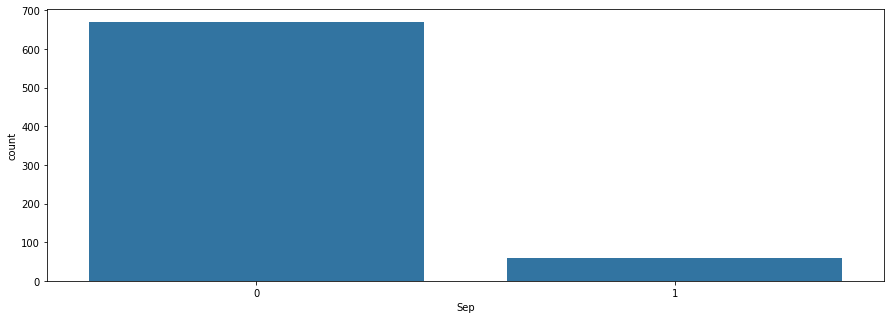

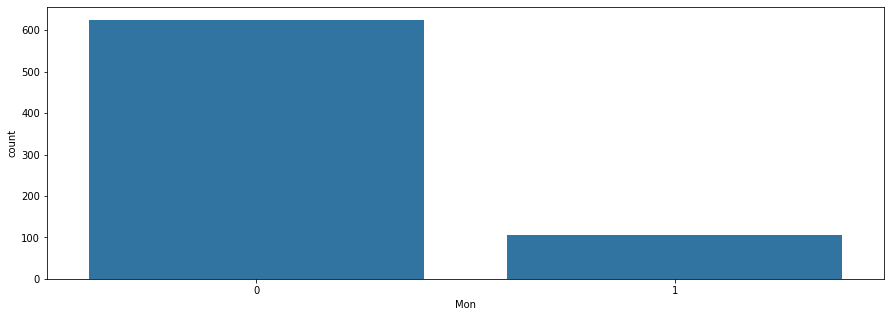

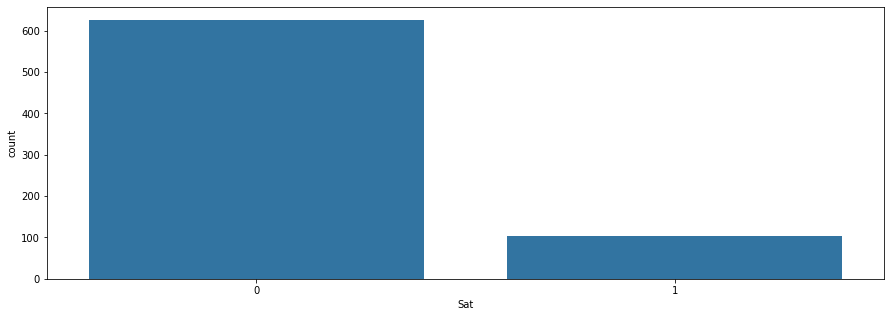

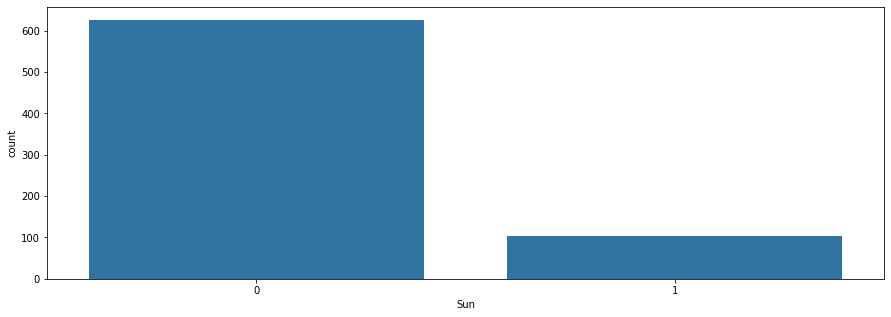

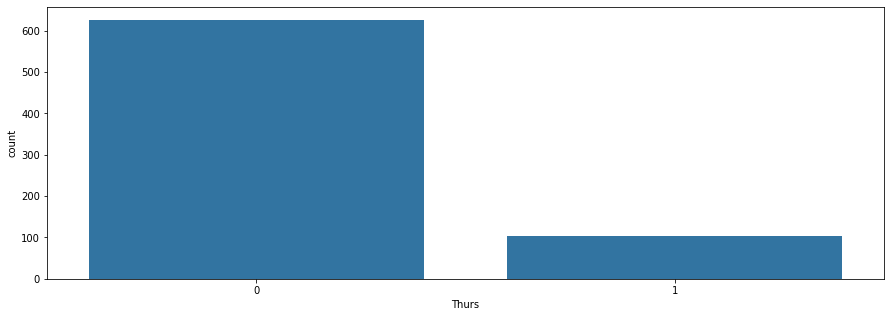

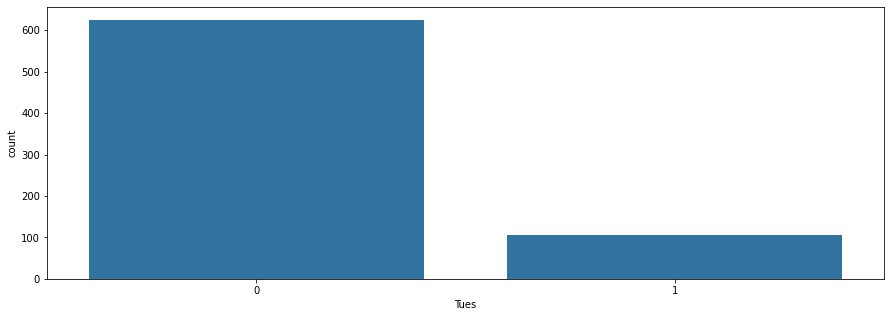

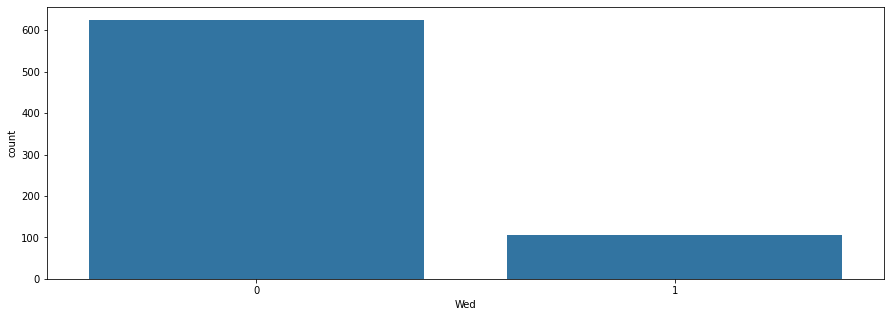

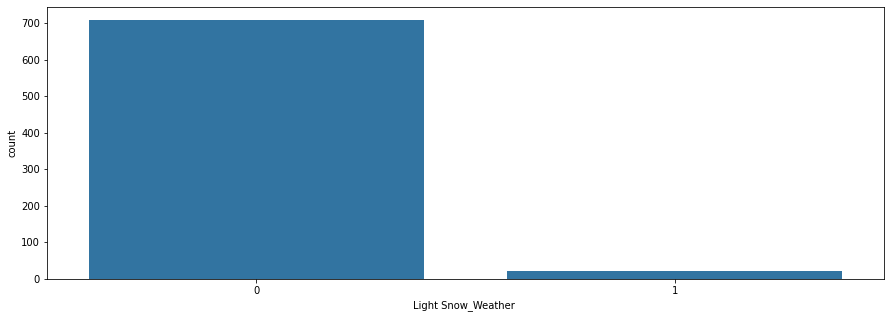

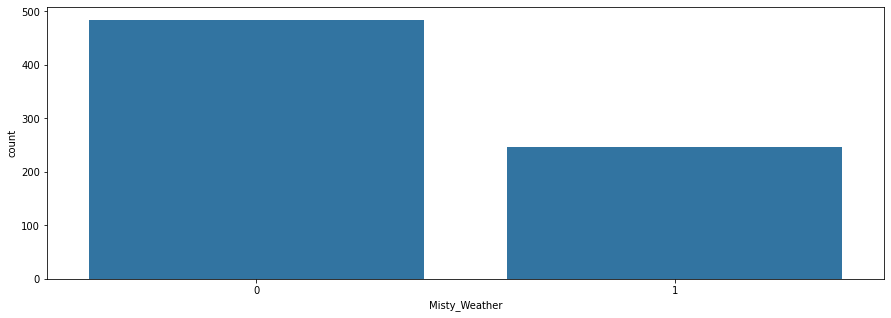

In [428]:
for col in cat_cols:
    plt.figure(figsize=(15,5))
    sns.countplot(x = df[col]  )
    plt.show()

### Points to Note:
#### 1) EDA of categorical variables are as expected and not very insightful


### Bivariate analysis

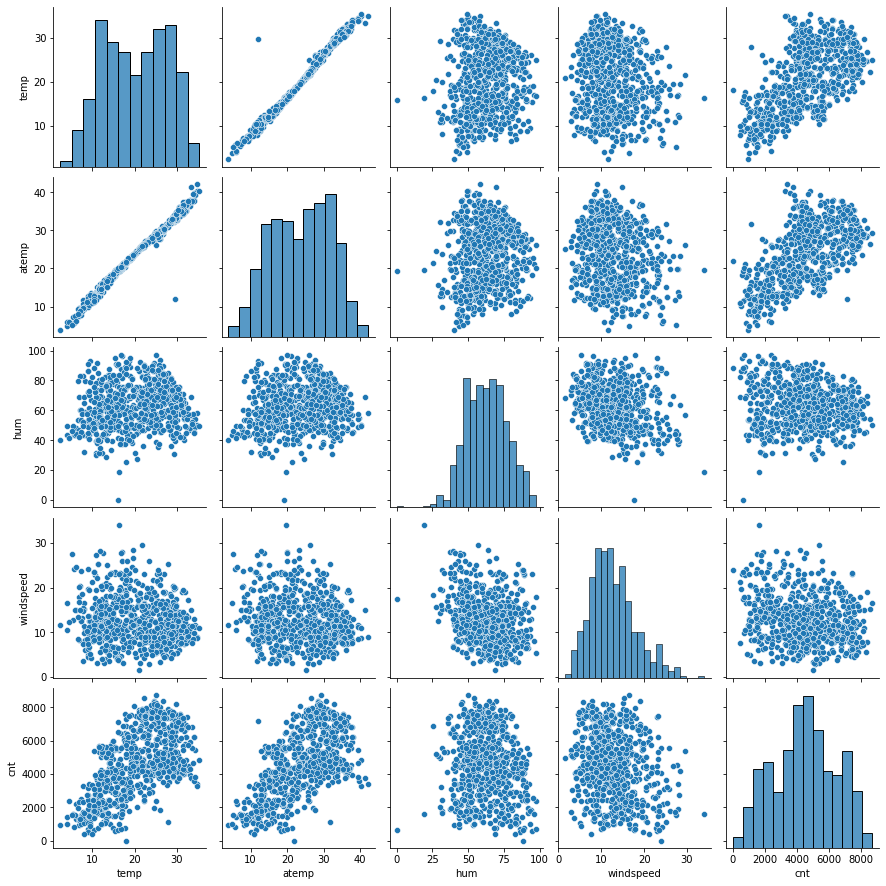

In [429]:
sns.pairplot(df[cont_var])
plt.show()

### Points to Note:
#### 1) There seems to be strong positive correlation between atemp and temp
#### 2) Both atemp and temp have some correlation with cnt
#### 3) There seems to be strong negative correlation between humidity and windspeed which is logical
#### 4) Windspeed and humidity doesn't seem to have a correlation with cnt

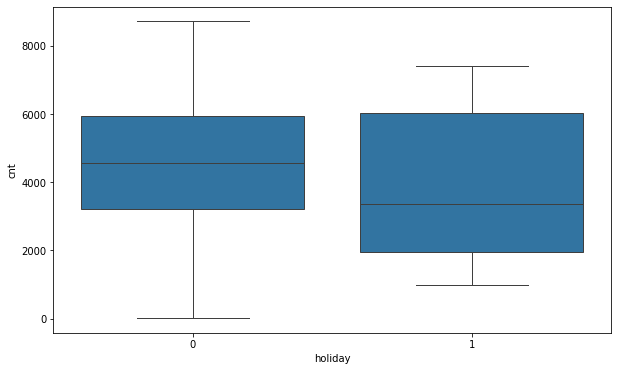

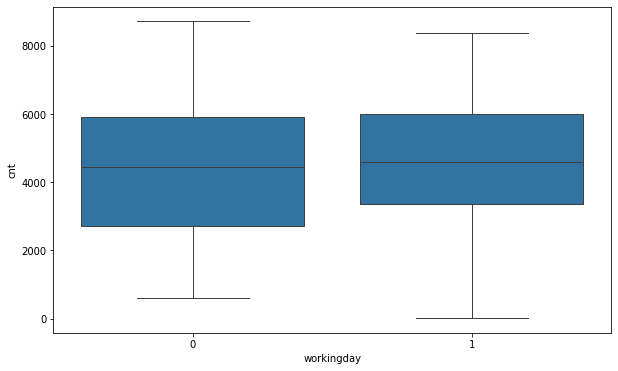

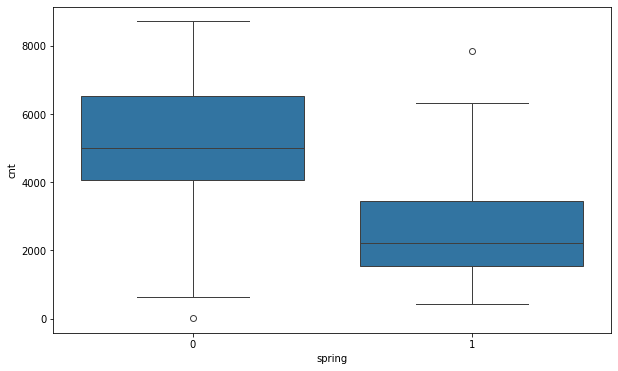

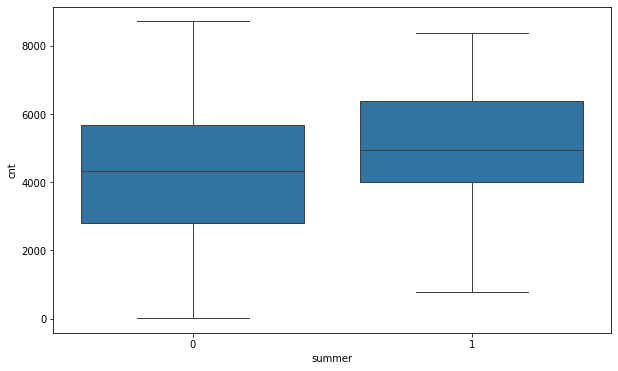

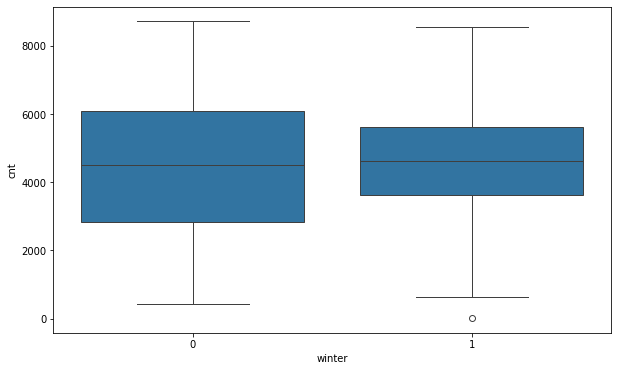

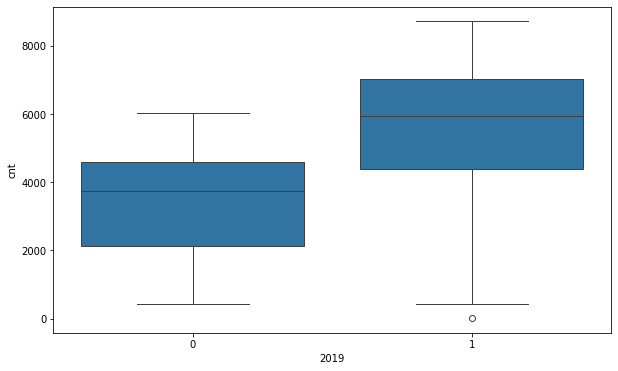

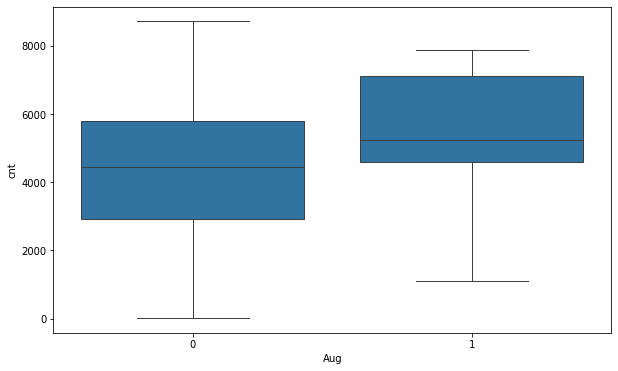

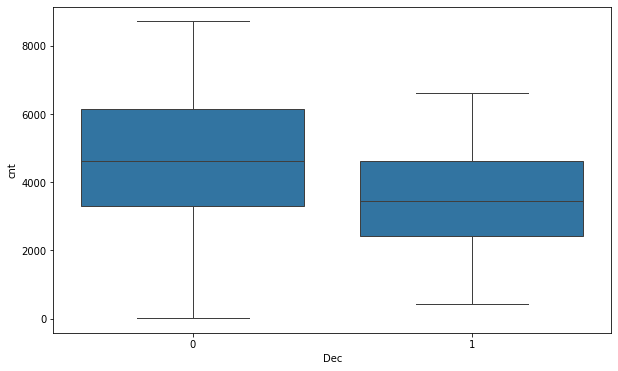

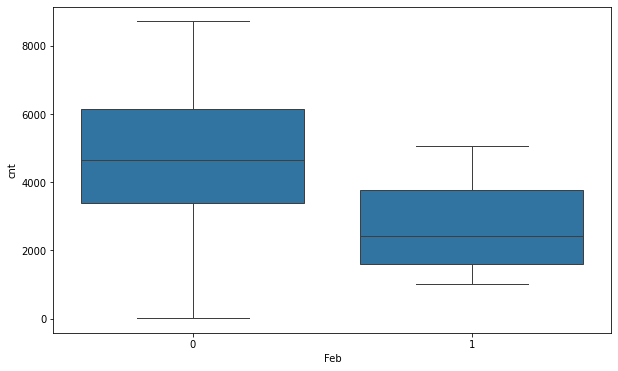

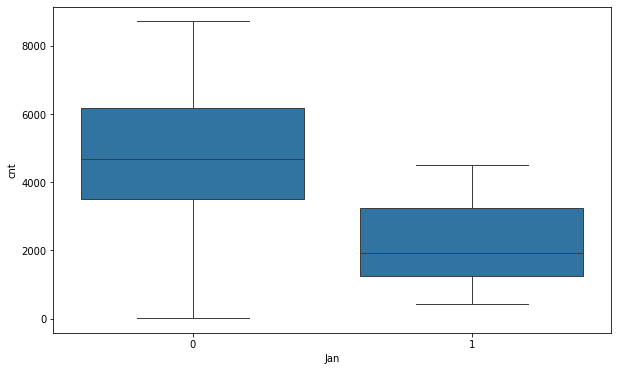

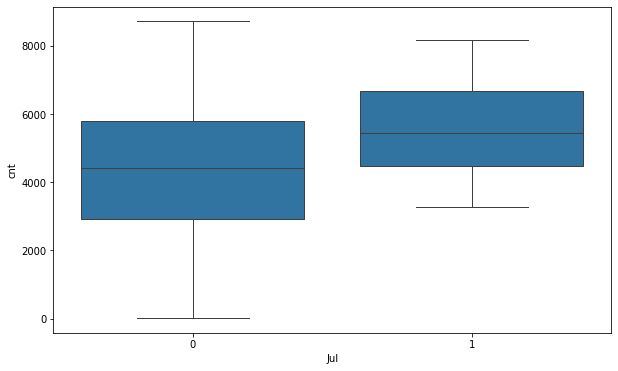

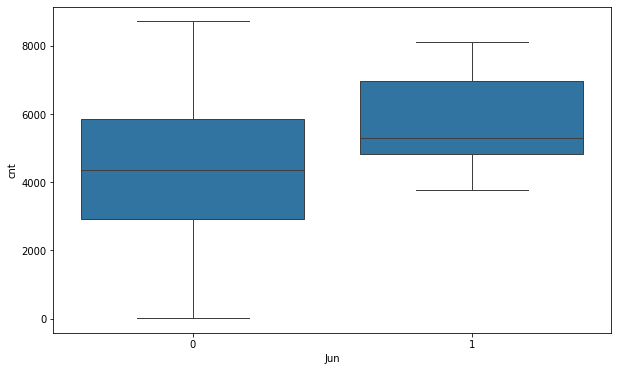

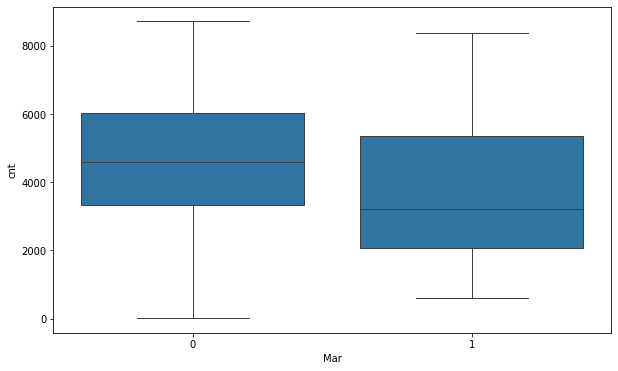

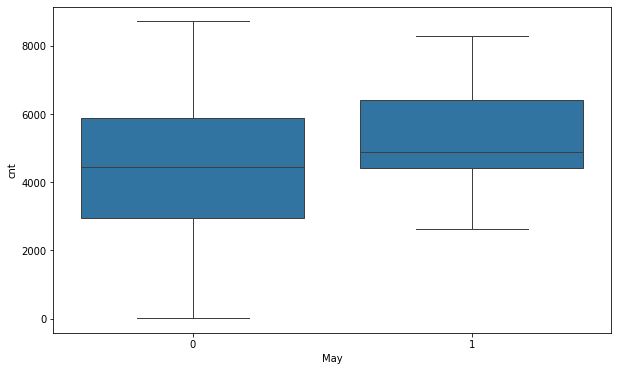

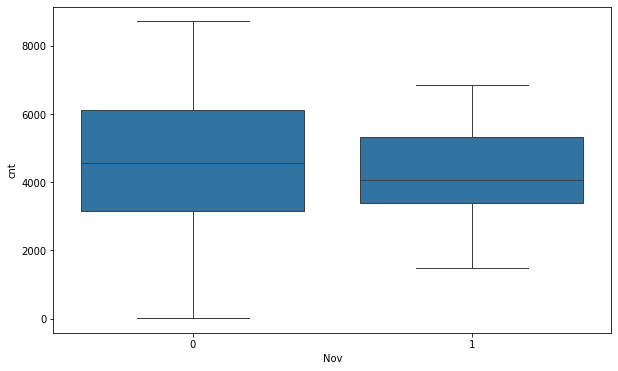

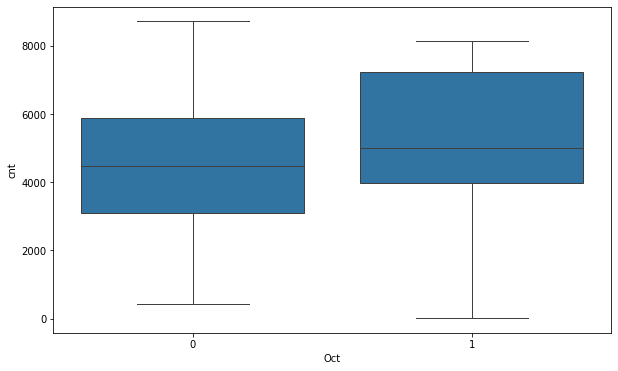

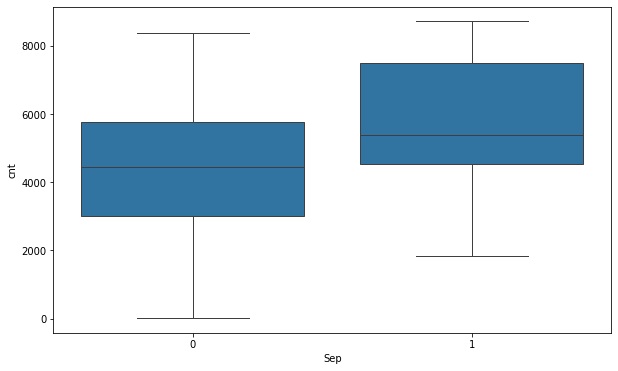

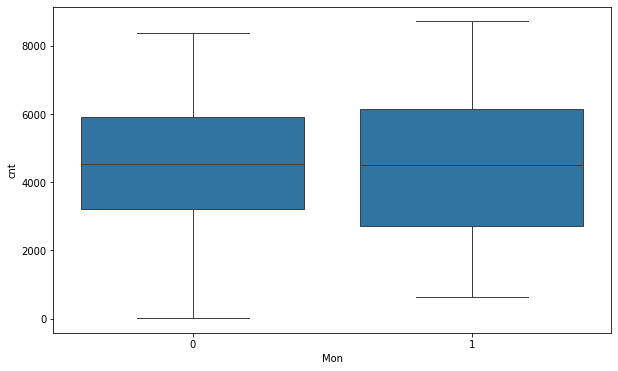

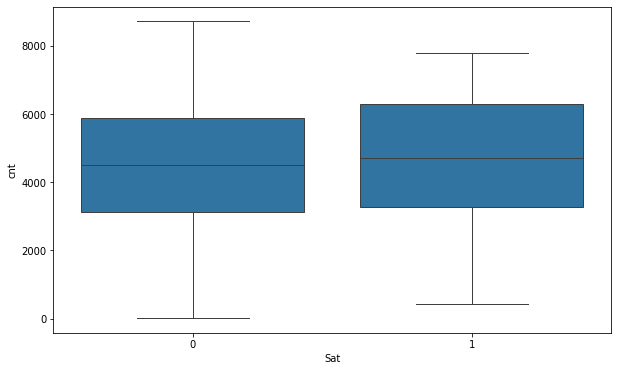

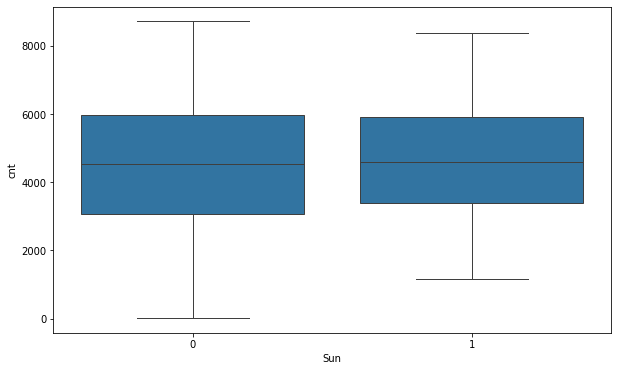

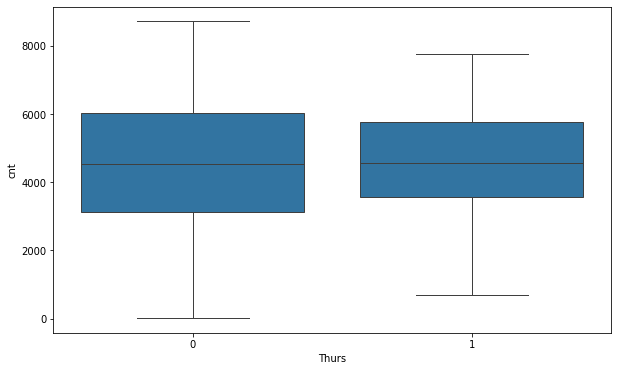

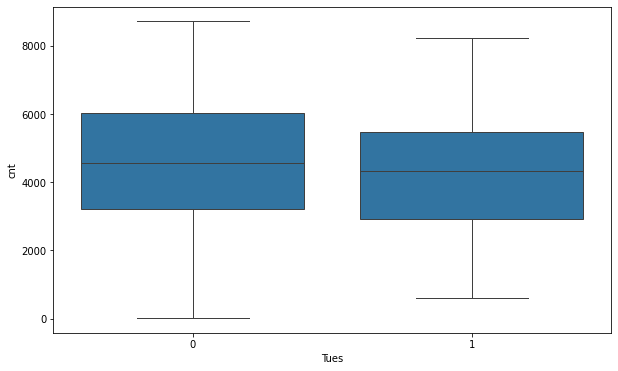

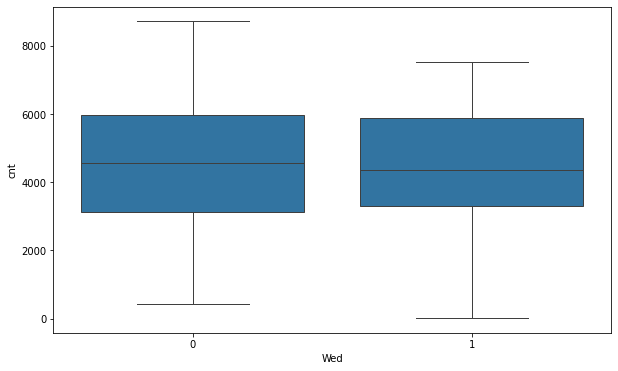

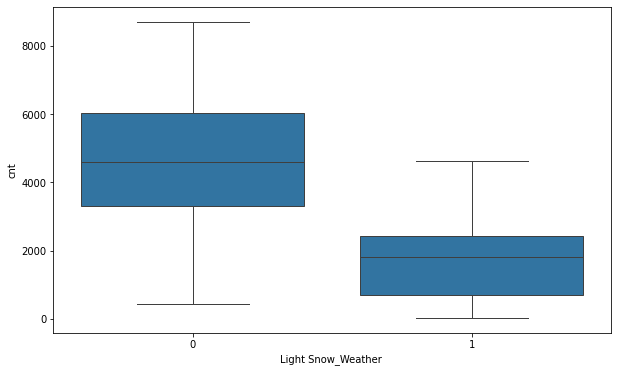

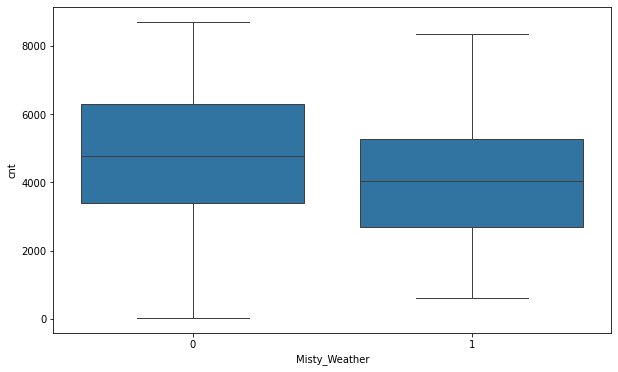

In [430]:
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x= df[col] ,  y= df['cnt'])
    plt.show()

### Points to Note:
#### 1) We have more cnt on non holiday days as compared to holiday days
#### 2) We have relatively equal cnt on working days and non working day which seems counter intutive
#### 3) We have less cnt in spring season as compared to otherwise
#### 4) We have more cnt in summer season as compared to otherwise
#### 5) We have relatively equal cnt on winter season as compared to otherwise
#### 6) We have relatively more cnt in year 2019 as compared to 2018
#### 7) We have relatively more cnt in month May - Oct as compared with other wise
#### 8) Day of the week doesn't seem to have much affect on cnt
#### 9) We have more cnt in clear whether as compared to otherwise

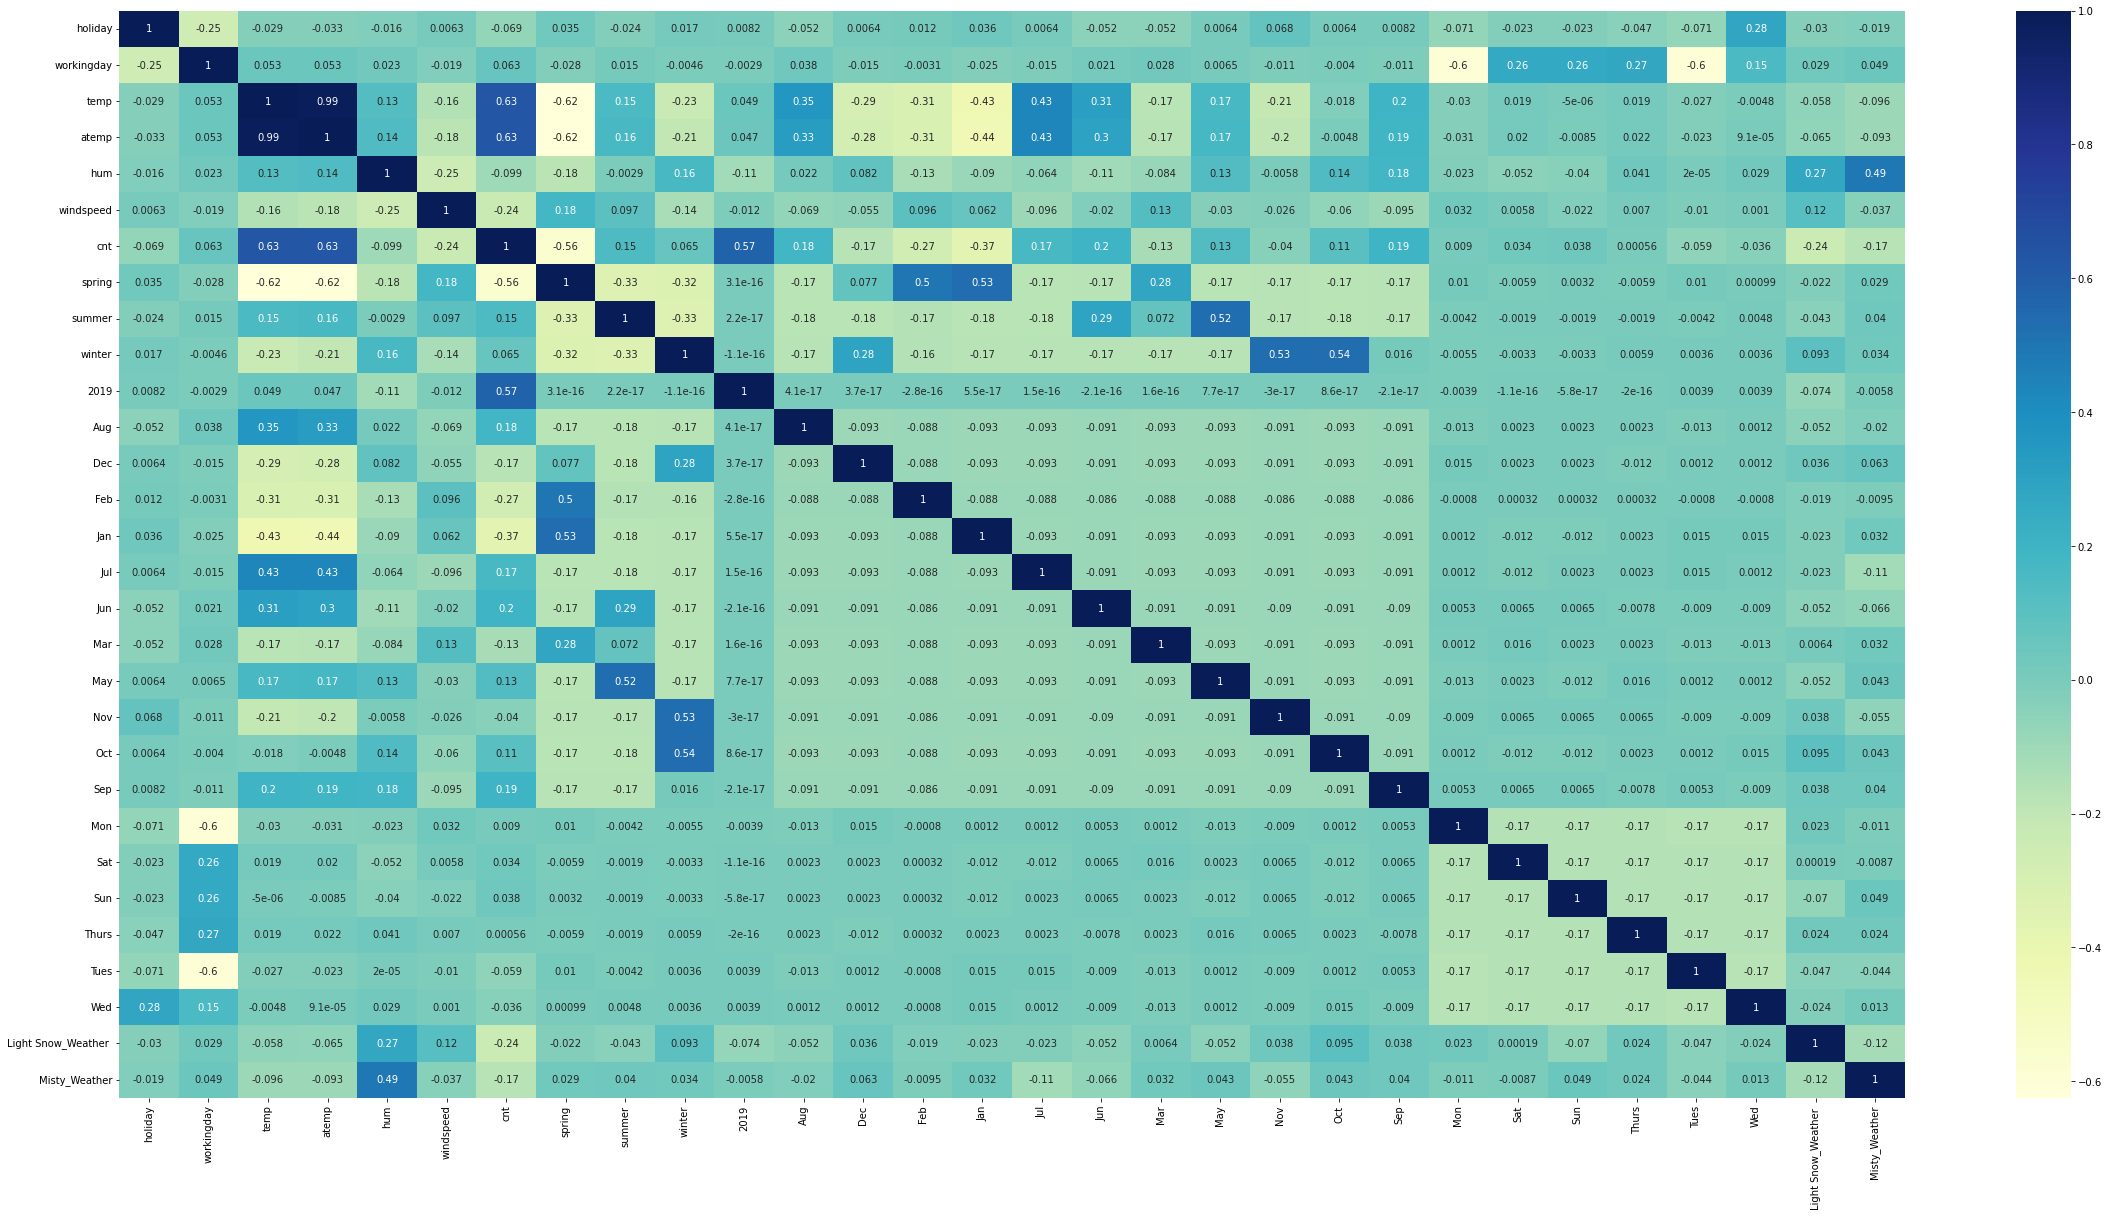

In [431]:
plt.figure(figsize = (40, 20))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Points to Note:
#### 1) Temp and atemp are highly correlated , which are further highly correlated with cnt
#### 2) year 2019 is strongly correlated with cnt 
#### 3) Spring season is strong negatively correlated with cnt 
#### 4) as expected months have some correlation with the seasons

## Splitting the Data into Training and Testing Sets

In [432]:

df_train, df_test = train_test_split(df,train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [433]:
scaler = MinMaxScaler()

In [434]:
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow_Weather,Misty_Weather
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [435]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow_Weather,Misty_Weather
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1


### Dividing into X and Y sets for the model building

In [436]:
y_train = df_train.pop('cnt')
X_train = df_train

First we will be creating a model from all the independent variables in hand

In [437]:

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [438]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          8.42e-181
Time:                        01:55:15   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2429      0.035      6.848      0.000       0.173       0.313
holiday                 0.0072      0.024      0.299      0.765      -0.040       0.055
workingday              0.0935      0.012      7.762      0.000       0.070       0.117
temp                    0.4013      0.142      2.821      0.005       0.122       0.681
atemp                   0.0506      0.138      0.366      0.714      -0.221       0.322
hum                    -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed              -0.1844      0.026     -7.003      0.000      -0.236      -0.133
spring                 -0.0486      0.030     -1.618      0.106      -0.108       0.010
summer                  0.0382      0.026      1.455      0.146      -0.013       0.090
winter                  0.1054      0.028      3.770      0.000       0.050       0.160
2019                    0.2322      0.008     28.792      0.000       0.216       0.248
Aug                     0.0161      0.034      0.473      0.637      -0.051       0.083
Dec                    -0.0456      0.034     -1.356      0.176      -0.112       0.020
Feb                    -0.0322      0.033     -0.978      0.329      -0.097       0.032
Jan                    -0.0626      0.034     -1.864      0.063      -0.129       0.003
Jul                    -0.0393      0.035     -1.116      0.265      -0.108       0.030
Jun                    -0.0017      0.025     -0.067      0.946      -0.051       0.048
Mar                     0.0013      0.025      0.052      0.958      -0.047       0.050
May                     0.0247      0.021      1.169      0.243      -0.017       0.066
Nov                    -0.0418      0.036     -1.149      0.251      -0.113       0.030
Oct                     0.0077      0.036      0.215      0.830      -0.063       0.078
Sep                     0.0818      0.032      2.549      0.011       0.019       0.145
Mon                     0.0984      0.014      7.274      0.000       0.072       0.125
Sat                    -0.0040      0.015     -0.274      0.784      -0.033       0.025
Sun                     0.0057      0.015      0.384      0.701      -0.024       0.035
Thurs                  -0.0136      0.015     -0.921      0.357      -0.043       0.015
Tues                    0.0438      0.014      3.194      0.001       0.017       0.071
Wed                    -0.0158      0.015     -1.079      0.281      -0.044       0.013
Light Snow_Weather     -0.2567      0.026     -9.712      0.000      -0.309      -0.205
Misty_Weather          -0.0610      0.010     -5.845      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):       

Now as an approach we will reduce the independent variables to 17 and from there on we will start reducing the variables manually

In [439]:
# Running RFE with the output number of the variable equal to 17
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 17)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [440]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 (2019, True, 1),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 13),
 ('May', False, 5),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 11),
 ('Sun', False, 9),
 ('Thurs', False, 8),
 ('Tues', False, 3),
 ('Wed', False, 7),
 ('Light Snow_Weather ', True, 1),
 ('Misty_Weather', True, 1)]

In [441]:
col = X_train.columns[rfe.support_]
col

Index([            'holiday',          'workingday',                'temp',
                       'hum',           'windspeed',              'spring',
                    'summer',              'winter',                  2019,
                       'Dec',                 'Jan',                 'Jul',
                       'Nov',                 'Sep',                 'Mon',
       'Light Snow_Weather ',       'Misty_Weather'],
      dtype='object')

In [442]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [443]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [444]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [445]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          9.55e-191
Time:                        01:55:15   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2759      0.037      7.452      0.000       0.203       0.349
holiday                -0.0520      0.027     -1.933      0.054      -0.105       0.001
workingday              0.0445      0.011      3.889      0.000       0.022       0.067
temp                    0.4750      0.036     13.038      0.000       0.403       0.547
hum                    -0.1474      0.037     -3.949      0.000      -0.221      -0.074
windspeed              -0.1876      0.025     -7.388      0.000      -0.237      -0.138
spring                 -0.0611      0.021     -2.925      0.004      -0.102      -0.020
summer                  0.0409      0.015      2.708      0.007       0.011       0.071
winter                  0.1052      0.018      5.949      0.000       0.070       0.140
2019                    0.2308      0.008     29.005      0.000       0.215       0.246
Dec                    -0.0405      0.017     -2.351      0.019      -0.074      -0.007
Jan                    -0.0458      0.018     -2.570      0.010      -0.081      -0.011
Jul                    -0.0526      0.018     -2.932      0.004      -0.088      -0.017
Nov                    -0.0420      0.018     -2.277      0.023      -0.078      -0.006
Sep                     0.0732      0.017      4.404      0.000       0.041       0.106
Mon                     0.0550      0.014      3.813      0.000       0.027       0.083
Light Snow_Weather     -0.2571      0.026     -9.865      0.000      -0.308      -0.206
Misty_Weather          -0.0598      0.010     -5.781      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       76.965   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.539
Skew:                          -0.747   Prob(JB):                     2.33e-45
Kurtosis:                       5.727   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [446]:
X_train_rfe.columns

Index([              'const',             'holiday',          'workingday',
                      'temp',                 'hum',           'windspeed',
                    'spring',              'summer',              'winter',
                        2019,                 'Dec',                 'Jan',
                       'Jul',                 'Nov',                 'Sep',
                       'Mon', 'Light Snow_Weather ',       'Misty_Weather'],
      dtype='object')

In [447]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [448]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.16
2,temp,19.14
1,workingday,5.37
4,windspeed,4.78
5,spring,4.57
7,winter,4.12
6,summer,2.87
16,Misty_Weather,2.32
8,2019,2.09
14,Mon,2.00


`humidity ('hum')` has high VIF in presence of other variables; can be dropped

In [449]:
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

Rebuilding the model without `hum`

In [450]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [451]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [452]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.49e-188
Time:                        01:55:15   Log-Likelihood:                 515.89
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     493   BIC:                            -925.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2055      0.033      6.242      0.000       0.141       0.270
holiday                -0.0499      0.027     -1.827      0.068      -0.104       0.004
workingday              0.0475      0.012      4.096      0.000       0.025       0.070
temp                    0.4360      0.036     12.254      0.000       0.366       0.506
windspeed              -0.1604      0.025     -6.467      0.000      -0.209      -0.112
spring                 -0.0701      0.021     -3.327      0.001      -0.112      -0.029
summer                  0.0340      0.015      2.237      0.026       0.004       0.064
winter                  0.0917      0.018      5.212      0.000       0.057       0.126
2019                    0.2345      0.008     29.241      0.000       0.219       0.250
Dec                    -0.0474      0.017     -2.731      0.007      -0.082      -0.013
Jan                    -0.0520      0.018     -2.882      0.004      -0.087      -0.017
Jul                    -0.0478      0.018     -2.630      0.009      -0.083      -0.012
Nov                    -0.0429      0.019     -2.291      0.022      -0.080      -0.006
Sep                     0.0669      0.017      3.989      0.000       0.034       0.100
Mon                     0.0598      0.015      4.097      0.000       0.031       0.088
Light Snow_Weather     -0.2987      0.024    -12.347      0.000      -0.346      -0.251
Misty_Weather          -0.0834      0.009     -9.751      0.000      -0.100      -0.067
==============================================================================
Omnibus:                       80.436   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.289
Skew:                          -0.770   Prob(JB):                     8.87e-49
Kurtosis:                       5.836   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [453]:
X_train_new.columns

Index([              'const',             'holiday',          'workingday',
                      'temp',           'windspeed',              'spring',
                    'summer',              'winter',                  2019,
                       'Dec',                 'Jan',                 'Jul',
                       'Nov',                 'Sep',                 'Mon',
       'Light Snow_Weather ',       'Misty_Weather'],
      dtype='object')

In [454]:
X_train_new = X_train_new.drop(['const'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.21
1,workingday,5.33
3,windspeed,4.72
4,spring,3.17
6,winter,3.03
5,summer,2.33
7,2019,2.08
13,Mon,1.99
11,Nov,1.81
9,Jan,1.68


`holiday` is insignificant in presence of other variables; can be dropped

In [455]:
X_train_new = X_train_lm.drop(["holiday"], axis = 1)

In [456]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          5.71e-189
Time:                        01:55:15   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1999      0.033      6.084      0.000       0.135       0.264
workingday              0.0548      0.011      5.027      0.000       0.033       0.076
temp                    0.4344      0.036     12.184      0.000       0.364       0.504
windspeed              -0.1610      0.025     -6.479      0.000      -0.210      -0.112
spring                 -0.0717      0.021     -3.394      0.001      -0.113      -0.030
summer                  0.0338      0.015      2.219      0.027       0.004       0.064
winter                  0.0919      0.018      5.209      0.000       0.057       0.127
2019                    0.2346      0.008     29.196      0.000       0.219       0.250
Dec                    -0.0483      0.017     -2.778      0.006      -0.083      -0.014
Jan                    -0.0528      0.018     -2.924      0.004      -0.088      -0.017
Jul                    -0.0469      0.018     -2.575      0.010      -0.083      -0.011
Nov                    -0.0469      0.019     -2.518      0.012      -0.083      -0.010
Sep                     0.0648      0.017      3.859      0.000       0.032       0.098
Mon                     0.0671      0.014      4.777      0.000       0.040       0.095
Light Snow_Weather     -0.2980      0.024    -12.291      0.000      -0.346      -0.250
Misty_Weather          -0.0831      0.009     -9.686      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       85.953   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.369
Skew:                          -0.809   Prob(JB):                     5.23e-54
Kurtosis:                       5.988   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [457]:
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,6.92
0,workingday,4.73
2,windspeed,4.71
3,spring,3.09
5,winter,3.02
4,summer,2.32
6,2019,2.08
12,Mon,1.86
10,Nov,1.78
8,Jan,1.67


`temp` has high VIF hence dropping

In [458]:
X_train_new = X_train_lm.drop(["temp"], axis = 1)

In [459]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     140.2
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          5.05e-162
Time:                        01:55:15   Log-Likelihood:                 447.16
No. Observations:                 510   AIC:                            -864.3
Df Residuals:                     495   BIC:                            -800.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5460      0.019     29.005      0.000       0.509       0.583
workingday              0.0562      0.012      4.527      0.000       0.032       0.081
windspeed              -0.1921      0.028     -6.821      0.000      -0.247      -0.137
spring                 -0.2487      0.017    -14.246      0.000      -0.283      -0.214
summer                 -0.0499      0.016     -3.217      0.001      -0.080      -0.019
winter                 -0.0171      0.017     -0.985      0.325      -0.051       0.017
2019                    0.2456      0.009     26.999      0.000       0.228       0.263
Dec                    -0.1132      0.019     -5.996      0.000      -0.150      -0.076
Jan                    -0.1221      0.020     -6.251      0.000      -0.161      -0.084
Jul                    -0.0153      0.021     -0.744      0.457      -0.056       0.025
Nov                    -0.1054      0.020     -5.144      0.000      -0.146      -0.065
Sep                     0.0500      0.019      2.620      0.009       0.012       0.087
Mon                     0.0661      0.016      4.129      0.000       0.035       0.098
Light Snow_Weather     -0.3180      0.028    -11.539      0.000      -0.372      -0.264
Misty_Weather          -0.0900      0.010     -9.228      0.000      -0.109      -0.071
==============================================================================
Omnibus:                       67.584   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.716
Skew:                          -0.666   Prob(JB):                     6.98e-39
Kurtosis:                       5.548   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [460]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [461]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.25
0,workingday,3.55
2,spring,3.03
4,winter,3.00
3,summer,2.25
5,2019,1.91
9,Nov,1.76
7,Jan,1.64
11,Mon,1.63
13,Misty_Weather,1.56


`Jul` is insignificant in presence of other variables; can be dropped

In [462]:
X_train_new = X_train_lm.drop(["Jul"], axis = 1)

In [463]:
X_train_lm = sm.add_constant(X_train_new)

In [464]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [465]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     151.1
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          5.30e-163
Time:                        01:55:15   Log-Likelihood:                 446.87
No. Observations:                 510   AIC:                            -865.7
Df Residuals:                     496   BIC:                            -806.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5400      0.017     31.683      0.000       0.507       0.574
workingday              0.0565      0.012      4.555      0.000       0.032       0.081
windspeed              -0.1920      0.028     -6.820      0.000      -0.247      -0.137
spring                 -0.2433      0.016    -15.336      0.000      -0.274      -0.212
summer                 -0.0445      0.014     -3.251      0.001      -0.071      -0.018
winter                 -0.0123      0.016     -0.763      0.446      -0.044       0.019
2019                    0.2457      0.009     27.019      0.000       0.228       0.264
Dec                    -0.1127      0.019     -5.977      0.000      -0.150      -0.076
Jan                    -0.1221      0.020     -6.253      0.000      -0.161      -0.084
Nov                    -0.1047      0.020     -5.118      0.000      -0.145      -0.065
Sep                     0.0543      0.018      2.997      0.003       0.019       0.090
Mon                     0.0662      0.016      4.139      0.000       0.035       0.098
Light Snow_Weather     -0.3181      0.028    -11.549      0.000      -0.372      -0.264
Misty_Weather          -0.0895      0.010     -9.203      0.000      -0.109      -0.070
==============================================================================
Omnibus:                       67.712   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.384
Skew:                          -0.671   Prob(JB):                     1.36e-38
Kurtosis:                       5.531   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [466]:
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.08
0,workingday,3.30
4,winter,2.83
2,spring,2.77
3,summer,1.99
5,2019,1.88
8,Nov,1.76
7,Jan,1.64
10,Mon,1.57
12,Misty_Weather,1.56


`winter` is insignificant in presence of other variables; can be dropped

In [467]:
X_train_new = X_train_lm.drop(["winter"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     163.8
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          5.41e-164
Time:                        01:55:15   Log-Likelihood:                 446.58
No. Observations:                 510   AIC:                            -867.2
Df Residuals:                     497   BIC:                            -812.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5360      0.016     33.127      0.000       0.504       0.568
workingday              0.0570      0.012      4.603      0.000       0.033       0.081
windspeed              -0.1926      0.028     -6.849      0.000      -0.248      -0.137
spring                 -0.2381      0.014    -16.617      0.000      -0.266      -0.210
summer                 -0.0403      0.013     -3.215      0.001      -0.065      -0.016
2019                    0.2457      0.009     27.037      0.000       0.228       0.264
Dec                    -0.1186      0.017     -6.915      0.000      -0.152      -0.085
Jan                    -0.1231      0.019     -6.322      0.000      -0.161      -0.085
Nov                    -0.1127      0.018     -6.423      0.000      -0.147      -0.078
Sep                     0.0558      0.018      3.101      0.002       0.020       0.091
Mon                     0.0665      0.016      4.160      0.000       0.035       0.098
Light Snow_Weather     -0.3207      0.027    -11.740      0.000      -0.374      -0.267
Misty_Weather          -0.0901      0.010     -9.305      0.000      -0.109      -0.071
==============================================================================
Omnibus:                       70.685   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.220
Skew:                          -0.690   Prob(JB):                     2.22e-41
Kurtosis:                       5.628   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [468]:
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.92
0,workingday,3.20
2,spring,2.38
4,2019,1.87
3,summer,1.77
6,Jan,1.63
9,Mon,1.54
11,Misty_Weather,1.54
7,Nov,1.22
8,Sep,1.20


## Residual Analysis of the train data

In [469]:
y_train_cnt = lm.predict(X_train_lm)

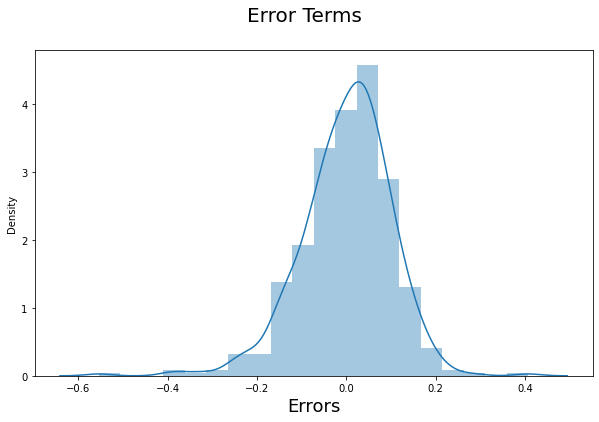

In [470]:

fig = plt.figure(figsize=(10,6))
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()# X-label

## Making Predictions

In [471]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [472]:
y_test = df_test.pop('cnt')
X_test = df_test

In [473]:
#using our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [474]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

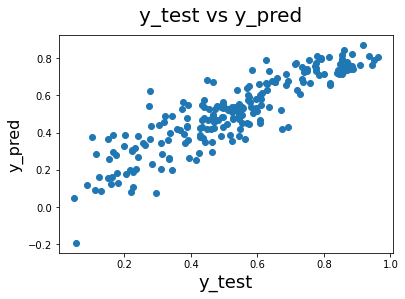

In [475]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [476]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7832504527952754

We can see that the equation of our best fitted line is:

cnt = 0.0570*workingday-0.1926*windspeed-0.2381*spring-0.0403*summer+0.2457*"2019"-0.1186*Dec-0.1231*Jan-0.1127*Nov+0.0558*Sep+0.0665*Mon-0.3207*Light Snow_Weather-0.0901*Misty_Weather+0.5360
